## Full MNIST dataset for digit image classification

In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST)

In [52]:
train_path = path/'training'
fnames = get_image_files(train_path)
dls = ImageDataLoaders.from_path_func(train_path, fnames, parent_label)

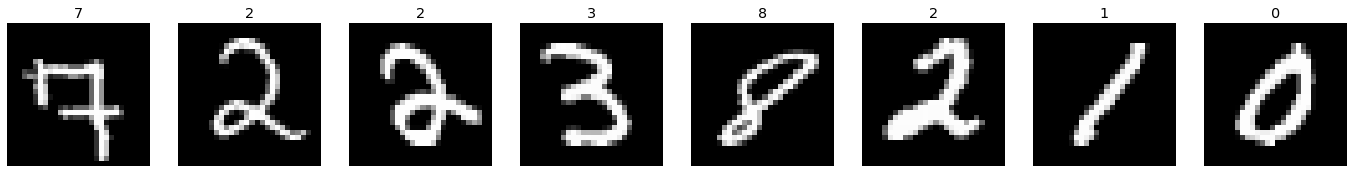

In [53]:
dls.train.show_batch(max_n=8, nrows=1)

In [54]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.fit_one_cycle(4, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.189901,3.631534,0.798417,00:38
1,0.756863,1.815145,0.963833,00:37
2,0.175856,0.097732,0.982833,00:37
3,0.039313,0.040063,0.988833,00:38


In [45]:
learn.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

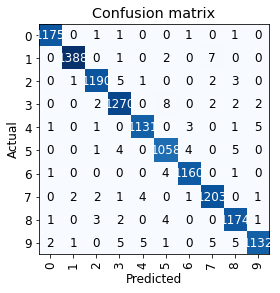

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
a5 = PILImage.create((path/'testing'/'5').ls()[0])
a5

In [46]:
res = learn.predict(a5)
res

('5',
 tensor(5),
 tensor([7.6830e-09, 1.2492e-08, 5.8493e-09, 5.6325e-06, 1.0330e-08, 9.9999e-01, 1.8937e-07, 5.9613e-08, 8.4577e-07, 3.0567e-07]))

In [33]:
a7 = PILImage.create((path/'testing'/'7').ls()[0])
a7

In [47]:
res = learn.predict(a7)
res

('7',
 tensor(7),
 tensor([3.5985e-08, 3.9497e-07, 2.2603e-07, 1.8958e-07, 4.2863e-07, 4.1680e-08, 2.0766e-09, 1.0000e+00, 3.9197e-07, 2.1012e-06]))

In [48]:
def classify_digit(digit):
    _, _, probs = learn.predict(digit)
    labeled_probs = zip(range(0, 10), probs)
    return max(labeled_probs, key=lambda t: t[1])[0]

In [49]:
classify_digit(a5)

5

In [55]:
learn.export()